In [22]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read the graphs into memory
finalG = nx.read_gpickle('20150902_all_ird Final Graph.pkl')
fullG = nx.read_gpickle('20150902_all_ird Full Complement Graph.pkl')

Compute the distribution of edge weights across the clonal descent edges, then compute the bottom 10%.

In [7]:
# Get the cut-off value for re-evaluation of clonal descent edges
weights = [d['pwi'] for _, _, d in fullG.edges(data=True)]
cutoff = np.percentile(weights, 10)
cutoff

7.6864049999999988

In [16]:
# Identify the sink nodes that are associated with edges that are below the cutoff.

sinks = dict()
for sc, sk, d in fullG.edges(data=True):
    if d['pwi'] < cutoff:
        sinks[sk] = d['pwi']
        
        
len(sinks)

1368

In [17]:
# How many of those sinks were identified as reassortant?
# First, identify the reassortant viruses in the finalG
reassortants = dict()
for sc, sk, d in finalG.edges(data=True):
    if d['edge_type'] == 'reassortant':
        reassortants[sk] = d['pwi']

In [18]:
# How many sinks were re-identified as reassortant viruses instead?
len(set(reassortants.keys()).intersection(sinks.keys()))

1357

In [21]:
# What is the distribution of PWI improvements?
improvements = dict()
for k, d in sinks.items():
    if k in reassortants.keys():
        improvements[k] = reassortants[k] - d

(array([ 151.,  570.,  236.,  142.,  157.,   44.,   16.,   20.,   15.,    6.]),
 array([ 0.004435 ,  0.1187419,  0.2330488,  0.3473557,  0.4616626,
         0.5759695,  0.6902764,  0.8045833,  0.9188902,  1.0331971,
         1.147504 ]),
 <a list of 10 Patch objects>)

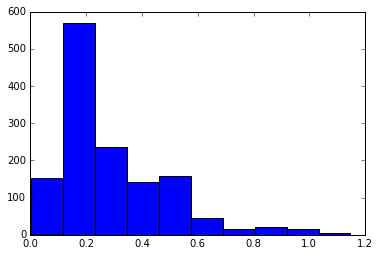

In [24]:
# Here's the histogram
plt.hist(list(improvements.values()))

In [27]:
# Min, median, max of PWI improvements
np.percentile(list(improvements.values()), [0, 50, 100])

array([ 0.004435,  0.219165,  1.147504])